<a href="https://colab.research.google.com/github/Gayatri259/TFS_GRIP/blob/main/TFS_GRIP_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The** **Sparks** **Foundation**
### #GRIPFEB2021 TASK-1

#**Name:** **Gayatri** **Chabra**
#**Topic:** **Prediction** **using** **Supervised** **ML**
In this task, we predict the percentage of a student based on the number of study hours. 
We find out what the predicted score will be if a student studies for 9.25 hours/day  

This is a Simple Linear Regression task as it involves only two variables.

The data can be found at http://bit.ly/w-data




#**Importing** **the** **Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

#**Reading** **the** **Dataset**

In [ ]:
df=pd.read_csv('http://bit.ly/w-data')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#**Analyzing** **the** **Dataset**

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.shape

(25, 2)

#**Checking** **the** **Null** **Values**

In [ ]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#**Visualizing** **the** **Dataset**

Text(0, 0.5, 'Scores')

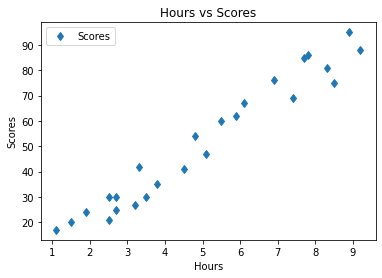

In [ ]:
df.plot(x='Hours', y='Scores', style='d')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')

The graph shows a positive linear relation between the two components- number of hours studied and percentage scored.

#**Preparing** **and** **Splitting** **the** **Dataset**

In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#**Training** **the** **Dataset**

In [ ]:
lm= LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.intercept_ #intercept

2.018160041434662

In [ ]:
lm.coef_ #coefficient

array([9.91065648])

#**Plotting** **the** **Regression** **Line**

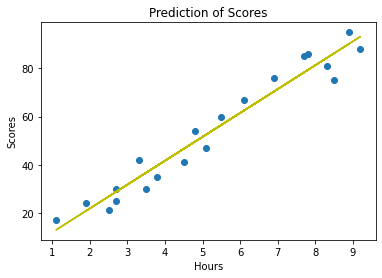

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lm.intercept_ + lm.coef_ * X_train, 'y')
plt.title('Prediction of Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

##Predicted Values

In [ ]:
print(X_test)
y_pred= lm.predict(X_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


##Actual Values

In [ ]:
print(y_test)

[20 27 69 30 62]


#**Comparison** **Between** **Both**

In [ ]:
ds= pd.DataFrame({'Actual Data':y_test, 'Predicted Data':y_pred})
ds.reset_index(drop=True, inplace=True)
ds

,Actual Data,Predicted Data
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#**Score** **Prediction** **for** **9.25** **hours/day** **of** **Studying**

In [ ]:
pred_score= lm.predict([[9.25]])
print(pred_score)

[93.69173249]


#**Evaluation** **of** **the** **Model**

In [ ]:
from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Explained Variance Score:", metrics.explained_variance_score(y_test,y_pred))

Mean Absolute Error:  4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
Explained Variance Score: 0.9482829156738145
